# 关于matplotlib文本框的各种设置记录

## 1.同一文本框中使用不同的颜色。

在[StackOverflow](https://stackoverflow.com/)中发现有以下两个提问涉及到这个问题：

1> https://stackoverflow.com/questions/9169052/partial-coloring-of-text-in-matplotlib

2> https://stackoverflow.com/questions/24108063/matplotlib-two-different-colors-in-the-same-annotate

主要涉及到两种不同思路：一种是通过调用latex的`\textcolor`包来实现多颜色文本；而另一种则是通过创建多个文本框，写入文字后再统一设置，使其看起来是一个文本框。

第一种思路在设置成功之后可以在任意涉及到文本的对象种使用，使用范围更广，更灵活，但其缺点在于需要安装latex，且有评论说只对早期matplotlib版本有效。

第二种则使用纯matplotlib的方式进行解决，matplotlib官网也给出了[例子](https://matplotlib.org/stable/gallery/text_labels_and_annotations/rainbow_text.html#sphx-glr-gallery-text-labels-and-annotations-rainbow-text-py)。但目前看来只适用于`ax.text()`，且不支持旋转（`rotation`）、对齐方式（`ha`/`va`)等关键字参数，对于其他类似于`ax.set_title()`、`ax.annotate()`也不适用。在这里先直接使用matplotlib官方例子，日后有时间看看是否可以对其进行优化。

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib.transforms import Affine2D

def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = text.get_transform() + Affine2D().translate(ex.width, 0)
        else:
            t = text.get_transform() + Affine2D().translate(0, ex.height)



默认设置下表现良好：

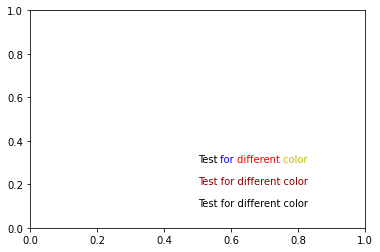

In [2]:

fig, ax = plt.subplots()
ax.text(.5, .1, "Test for different color", transform=ax.transAxes)

ax.text(.5, .2, "Test for different color", transform=ax.transAxes, color='darkred')

rainbow_text(.5, .3, "Test for different color".split(), ['k', 'b', 'r', 'y'])

设置水平和垂直对齐方式后出现错位：

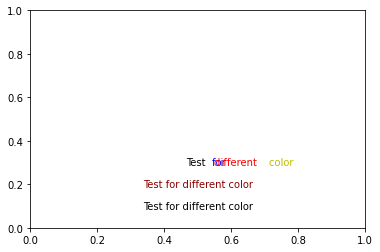

In [3]:
fig, ax = plt.subplots()
ax.text(.5, .1, "Test for different color", transform=ax.transAxes, ha='center', va='center')

ax.text(.5, .2, "Test for different color", transform=ax.transAxes, color='darkred', ha='center', va='center')

rainbow_text(.5, .3, "Test for different color".split(), ['k', 'b', 'r', 'y'], ha='center', va='center')

设置旋转角度后出现错位：

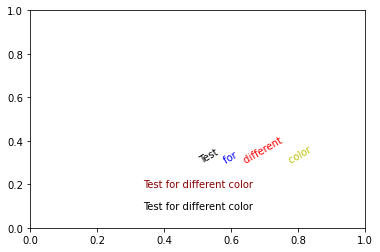

In [4]:
fig, ax = plt.subplots()
ax.text(.5, .1, "Test for different color", transform=ax.transAxes, ha='center', va='center')

ax.text(.5, .2, "Test for different color", transform=ax.transAxes, color='darkred', ha='center', va='center')

rainbow_text(.5, .3, "Test for different color".split(), ['k', 'b', 'r', 'y'], rotation=30)